In [9]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd
medicare = pd.read_csv("/netapp2/home/se197/data/CMS/Data/medicare.csv")


# In[2]:


train_set = medicare[medicare.Hospital != 'BWH'] # MGH; n = 204014
validation_set = medicare[medicare.Hospital == 'BWH'] # BWH and Neither; n = 115726
import numpy as np

fifty_perc_EHR_cont = np.percentile(medicare['Cal_MPEC_R0'],50)
train_set_high = train_set[train_set.Cal_MPEC_R0 >= fifty_perc_EHR_cont]
train_set_low= train_set[train_set.Cal_MPEC_R0 < fifty_perc_EHR_cont]

validation_set_high = validation_set[validation_set.Cal_MPEC_R0 >= fifty_perc_EHR_cont]
validation_set_low = validation_set[validation_set.Cal_MPEC_R0 < fifty_perc_EHR_cont]


# In[3]:


predictor_variable = [
 'Co_CAD_RC0', 'Co_Embolism_RC0', 'Co_DVT_RC0', 'Co_PE_RC0', 'Co_AFib_RC0',
        'Co_Hypertension_RC0', 'Co_Hyperlipidemia_RC0', 'Co_Atherosclerosis_RC0',
        'Co_HF_RC0', 'Co_HemoStroke_RC0', 'Co_IscheStroke_RC0', 'Co_OthStroke_RC0',
        'Co_TIA_RC0', 'Co_COPD_RC0', 'Co_Asthma_RC0', 'Co_Pneumonia_RC0', 'Co_Alcoholabuse_RC0',
        'Co_Drugabuse_RC0', 'Co_Epilepsy_RC0', 'Co_Cancer_RC0', 'Co_MorbidObesity_RC0',
        'Co_Dementia_RC0', 'Co_Depression_RC0', 'Co_Bipolar_RC0', 'Co_Psychosis_RC0',
        'Co_Personalitydisorder_RC0', 'Co_Adjustmentdisorder_RC0', 'Co_Anxiety_RC0',
        'Co_Generalizedanxiety_RC0', 'Co_OldMI_RC0', 'Co_AcuteMI_RC0', 'Co_PUD_RC0',
        'Co_UpperGIbleed_RC0', 'Co_LowerGIbleed_RC0', 'Co_Urogenitalbleed_RC0',
        'Co_Othbleed_RC0', 'Co_PVD_RC0', 'Co_LiverDisease_RC0', 'Co_MRI_RC0',
        'Co_ESRD_RC0', 'Co_Obesity_RC0', 'Co_Sepsis_RC0', 'Co_Osteoarthritis_RC0',
        'Co_RA_RC0', 'Co_NeuroPain_RC0', 'Co_NeckPain_RC0', 'Co_OthArthritis_RC0',
        'Co_Osteoporosis_RC0', 'Co_Fibromyalgia_RC0', 'Co_Migraine_RC0', 'Co_Headache_RC0',
        'Co_OthPain_RC0', 'Co_GeneralizedPain_RC0', 'Co_PainDisorder_RC0',
        'Co_Falls_RC0', 'Co_CoagulationDisorder_RC0', 'Co_WhiteBloodCell_RC0', 'Co_Parkinson_RC0',
        'Co_Anemia_RC0', 'Co_UrinaryIncontinence_RC0', 'Co_DecubitusUlcer_RC0',
        'Co_Oxygen_RC0', 'Co_Mammography_RC0', 'Co_PapTest_RC0', 'Co_PSATest_RC0',
        'Co_Colonoscopy_RC0', 'Co_FecalOccultTest_RC0', 'Co_FluShot_RC0', 'Co_PneumococcalVaccine_RC0' , 'Co_RenalDysfunction_RC0', 'Co_Valvular_RC0', 'Co_Hosp_Prior30Days_RC0',
        'Co_RX_Antibiotic_RC0', 'Co_RX_Corticosteroid_RC0', 'Co_RX_Aspirin_RC0', 'Co_RX_Dipyridamole_RC0',
        'Co_RX_Clopidogrel_RC0', 'Co_RX_Prasugrel_RC0', 'Co_RX_Cilostazol_RC0', 'Co_RX_Ticlopidine_RC0',
        'Co_RX_Ticagrelor_RC0', 'Co_RX_OthAntiplatelet_RC0', 'Co_RX_NSAIDs_RC0',
        'Co_RX_Opioid_RC0', 'Co_RX_Antidepressant_RC0', 'Co_RX_AAntipsychotic_RC0', 'Co_RX_TAntipsychotic_RC0',
        'Co_RX_Anticonvulsant_RC0', 'Co_RX_PPI_RC0', 'Co_RX_H2Receptor_RC0', 'Co_RX_OthGastro_RC0',
        'Co_RX_ACE_RC0', 'Co_RX_ARB_RC0', 'Co_RX_BBlocker_RC0', 'Co_RX_CCB_RC0', 'Co_RX_Thiazide_RC0',
        'Co_RX_Loop_RC0', 'Co_RX_Potassium_RC0', 'Co_RX_Nitrates_RC0', 'Co_RX_Aliskiren_RC0',
        'Co_RX_OthAntihypertensive_RC0', 'Co_RX_Antiarrhythmic_RC0', 'Co_RX_OthAnticoagulant_RC0',
        'Co_RX_Insulin_RC0', 'Co_RX_Noninsulin_RC0', 'Co_RX_Digoxin_RC0', 'Co_RX_Statin_RC0',
        'Co_RX_Lipid_RC0', 'Co_RX_Lithium_RC0', 'Co_RX_Benzo_RC0', 'Co_RX_ZDrugs_RC0',
        'Co_RX_OthAnxiolytic_RC0', 'Co_RX_Dementia_RC0', 'Co_RX_Hormone_RC0',
        'Co_RX_Osteoporosis_RC0', 'Co_N_Drugs_RC0', 'Co_N_Hosp_RC0', 'Co_Total_HospLOS_RC0',
        'Co_N_MDVisit_RC0', 'Co_RX_AnyAspirin_RC0', 'Co_RX_AspirinMono_RC0', 'Co_RX_ClopidogrelMono_RC0',
        'Co_RX_AspirinClopidogrel_RC0', 'Co_RX_DM_RC0', 'Co_RX_Antipsychotic_RC0'
]
co_train_gpop = train_set[predictor_variable]
co_train_gpop_split = np.array_split(co_train_gpop, 5)

co_train_high = train_set_high[predictor_variable]
co_train_high_split = np.array_split(co_train_high, 5)

co_train_low = train_set_low[predictor_variable]
co_train_low_split = np.array_split(co_train_low, 5)

co_validation_gpop = validation_set[predictor_variable]
co_validation_gpop_split = np.array_split(co_validation_gpop, 5)

co_validation_high = validation_set_high[predictor_variable]
co_validation_high_split = np.array_split(co_validation_high, 5)

co_validation_low = validation_set_low[predictor_variable]
co_validation_low_split = np.array_split(co_validation_low, 5)



co_validation_gpop = validation_set[predictor_variable]
co_validation_gpop_split = np.array_split(co_validation_gpop, 5)  

co_validation_high = validation_set_high[predictor_variable]
co_validation_high_split = np.array_split(co_validation_high, 5)  

co_validation_low = validation_set_low[predictor_variable]
co_validation_low_split = np.array_split(co_validation_low, 5)  

out_train_death_gpop = train_set['ehr_claims_death']
out_train_death_gpop_split = []
for parts in co_train_gpop_split:
    out_train_death_gpop_split.append(out_train_death_gpop[parts.index])

out_train_death_high = train_set_high['ehr_claims_death']
out_train_death_high_split = []
for parts in co_train_high_split:
    out_train_death_high_split.append(out_train_death_high[parts.index])

out_train_death_low = train_set_low['ehr_claims_death']
out_train_death_low_split = []
for parts in co_train_low_split:
    out_train_death_low_split.append(out_train_death_low[parts.index])

out_validation_death_gpop = validation_set['ehr_claims_death']
out_validation_death_gpop_split = []
for parts in co_validation_gpop_split:
    out_validation_death_gpop_split.append(out_validation_death_gpop[parts.index])


out_validation_death_high = validation_set_high['ehr_claims_death']
out_validation_death_high_split = []
for parts in co_validation_high_split:
    out_validation_death_high_split.append(out_validation_death_high[parts.index])



out_validation_death_low = validation_set_low['ehr_claims_death']
out_validation_death_low_split = []
for parts in co_validation_low_split:
    out_validation_death_low_split.append(out_validation_death_low[parts.index])



# In[5]:


def rf(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV

    param_grid = {'bootstrap': [True],
         'max_depth': [6, 10],
         'min_samples_leaf': [3, 5],
         'min_samples_split': [4, 6],
         'n_estimators': [100, 350]
        }


    forest_clf = RandomForestClassifier()

    forest_grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                                      scoring="accuracy",
                                      return_train_score=True,
                                      verbose=True,
                                      n_jobs=10)

    best_clf = forest_grid_search.fit(X_train, y_train)
    return best_clf 


# In[6]:


def scores(X,y):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import fbeta_score
    from sklearn.metrics import roc_auc_score 
    from sklearn.metrics import log_loss

    pred = best_clf.predict(X)
    actual = y
    #file = open('hem_smote_rf_ehr.out', 'a')
    print(accuracy_score(actual,pred),file = open('hem_smote_rf_ehr.out', 'a'))
    print(f1_score(actual,pred),file = open('hem_smote_rf_ehr.out', 'a'))
    print(fbeta_score(actual,pred, average = 'macro', beta = 2),file = open('hem_smote_rf_ehr.out', 'a'))
    print(roc_auc_score(actual, best_clf.predict_proba(X)[:,1]),file = open('hem_smote_rf_ehr.out', 'a'))
    print(log_loss(actual,best_clf.predict_proba(X)[:,1]),file = open('hem_smote_rf_ehr.out', 'a'))


# In[10]:


def cross_val(X,y,Or_X, Or_y):
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_validate
    from sklearn.metrics import log_loss
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import fbeta_score
    import sklearn
    import numpy as np
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    log_loss = [] 
    auc = [] 
    accuracy = [] 
    f1 = [] 
    f2 = [] 
    iter = 0
    for train_index, test_index in cv.split(X):
        
        X_train, X_test, y_train, y_test = X.iloc[train_index], Or_X[iter], y.iloc[train_index], Or_y[iter]
        iter = iter+1
        model = rf(X_train, y_train)
        prob = model.predict_proba(X_test)[:,1] # prob is a vector of probabilities 
        print(prob)
        pred = np.round(prob) # pred is the rounded predictions 
        
        log_loss.append(sklearn.metrics.log_loss(y_test, prob))
        auc.append(sklearn.metrics.roc_auc_score(y_test, prob))
        accuracy.append(sklearn.metrics.accuracy_score(y_test, pred))
        f1.append(sklearn.metrics.f1_score(y_test, pred, average = 'macro'))
        f2.append(fbeta_score(y_test,pred, average = 'macro', beta = 2))
    print(np.mean(accuracy),file = open('hem_smote_rf_ehr.out', 'a'))
    print(np.mean(f1),file = open('hem_smote_rf_ehr.out', 'a'))
    print(np.mean(f2),file = open('hem_smote_rf_ehr.out', 'a'))
    print(np.mean(auc),file = open('hem_smote_rf_ehr.out', 'a'))
    print(np.mean(log_loss),file = open('hem_smote_rf_ehr.out', 'a'))
#co_train_gpop_sm,out_train_death_gpop_sm, co_validation_gpop_split, out_validation_death_gpop_split


# # General Population

# In[11]:

print("START",file = open('hem_smote_rf_ehr.out', 'a'))
print("Gpop",file = open('hem_smote_rf_ehr.out', 'a'))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
co_train_gpop_sm,out_train_death_gpop_sm = sm.fit_resample(co_train_gpop,out_train_death_gpop)

best_clf = rf(co_train_gpop_sm, out_train_death_gpop_sm)
g_pred = best_clf.predict_proba(co_validation_gpop)[:,1]

# In[12]:


#cross_val(co_train_gpop_sm, out_train_death_gpop_sm, co_validation_gpop_split, out_validation_death_gpop_split)
#, file = open('hem_smote_rf_ehr.out', 'a')
print("")

#scores(co_train_gpop, out_train_death_gpop)
#, file = open('hem_smote_rf_ehr.out', 'a')
print("")

print("",file = open('hem_smote_rf_ehr.out', 'a'))

scores(co_validation_gpop, out_validation_death_gpop)


# # Low Continuity 

# In[13]:



print("Low",file = open('hem_smote_rf_ehr.out', 'a'))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
co_train_low_sm,out_train_death_low_sm = sm.fit_resample(co_train_low,out_train_death_low)

best_clf = rf(co_train_low_sm, out_train_death_low_sm)
l_pred = best_clf.predict_proba(co_validation_low)[:,1]

#cross_val(co_train_low_sm, out_train_death_low_sm, co_validation_low_split, out_validation_death_low_split)
#, file = open('hem_smote_rf_ehr.out', 'a')
#print("")

#scores(co_train_low, out_train_death_low)

#, file = open('hem_smote_rf_ehr.out', 'a')
#print("")

#print("",file = open('hem_smote_rf_ehr.out', 'a'))

#scores(co_validation_low, out_validation_death_low)


# # High Continuity

# In[14]:


print("High",file = open('hem_smote_rf_ehr.out', 'a'))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
co_train_high_sm,out_train_death_high_sm = sm.fit_resample(co_train_high,out_train_death_high)

best_clf = rf(co_train_high_sm, out_train_death_high_sm)
h_prob = best_clf.predict_proba(co_validation_high)[:,1]
#cross_val(co_train_high_sm, out_train_death_high_sm, co_validation_high_split, out_validation_death_high_split)
#, file = open('hem_smote_rf_ehr.out', 'a')
#print("")

#scores(co_train_high, out_train_death_high)
#, file = open('hem_smote_rf_ehr.out', 'a')
#print("",file = open('hem_smote_rf_ehr.out', 'a'))

#scores(co_validation_high, out_validation_death_high)


# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:






Fitting 5 folds for each of 16 candidates, totalling 80 fits


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [10]:
import pandas as pd
import numpy as np
import scipy.stats

# AUC comparison adapted from
# https://github.com/Netflix/vmaf/
def compute_midrank(x):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=np.float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=np.float)
    # Note(kazeevn) +1 is due to Python using 0-based indexing
    # instead of 1-based in the AUC formula in the paper
    T2[J] = T + 1
    return T2


def fastDeLong(predictions_sorted_transposed, label_1_count):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Operating Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=np.float)
    ty = np.empty([k, n], dtype=np.float)
    tz = np.empty([k, m + n], dtype=np.float)
    for r in range(k):
        tx[r, :] = compute_midrank(positive_examples[r, :])
        ty[r, :] = compute_midrank(negative_examples[r, :])
        tz[r, :] = compute_midrank(predictions_sorted_transposed[r, :])
    aucs = tz[:, :m].sum(axis=1) / m / n - float(m + 1.0) / 2.0 / n
    v01 = (tz[:, :m] - tx[:, :]) / n
    v10 = 1.0 - (tz[:, m:] - ty[:, :]) / m
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def calc_pvalue(aucs, sigma):
    """Computes log(10) of p-values.
    Args:
       aucs: 1D array of AUCs
       sigma: AUC DeLong covariances
    Returns:
       log10(pvalue)
    """
    l = np.array([[1, -1]])
    z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))
    return np.log10(2) + scipy.stats.norm.logsf(z, loc=0, scale=1) / np.log(10)


def compute_ground_truth_statistics(ground_truth):
    assert np.array_equal(np.unique(ground_truth), [0, 1])
    order = (-ground_truth).argsort()
    label_1_count = int(ground_truth.sum())
    return order, label_1_count


def delong_roc_variance(ground_truth, predictions):
    """
    Computes ROC AUC variance for a single set of predictions
    Args:
       ground_truth: np.array of 0 and 1
       predictions: np.array of floats of the probability of being class 1
    """
    order, label_1_count = compute_ground_truth_statistics(ground_truth)
    predictions_sorted_transposed = predictions[np.newaxis, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count)
    assert len(aucs) == 1, "There is a bug in the code, please forward this to the developers"
    return aucs[0], delongcov


def delong_roc_test(ground_truth, predictions_one, predictions_two):
    """
    Computes log(p-value) for hypothesis that two ROC AUCs are different
    Args:
       ground_truth: np.array of 0 and 1
       predictions_one: predictions of the first model,
          np.array of floats of the probability of being class 1
       predictions_two: predictions of the second model,
          np.array of floats of the probability of being class 1
    """
    order, label_1_count = compute_ground_truth_statistics(ground_truth)
    predictions_sorted_transposed = np.vstack((predictions_one, predictions_two))[:, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count)
    return calc_pvalue(aucs, delongcov)


In [11]:
#10 ** delong_roc_test(out_validation_death_gpop, h_prob, l_pred)

In [12]:
#10 ** delong_roc_test(out_validation_death_gpop, h_prob, g_pred)

In [13]:
#10 ** delong_roc_test(out_validation_death_gpop, l_pred, g_pred)

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score 
import matplotlib.pyplot as plt 

gpop_fpr, gpop_tpr, _ = roc_curve(out_validation_death_gpop, g_pred)
high_fpr, high_tpr, _ = roc_curve(out_validation_death_high, h_prob)
low_fpr, low_tpr, _ = roc_curve(out_validation_death_low, l_pred)


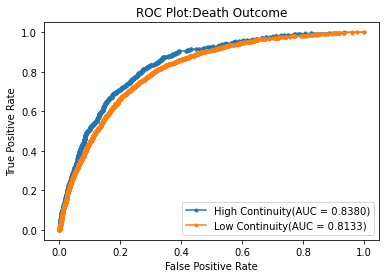

In [15]:
#plt.plot(gpop_fpr,gpop_tpr , marker ='.', label='General Population (AUC = %0.4f)' % 0.7543)
plt.plot(high_fpr, high_tpr, marker='.', label='High Continuity(AUC = %0.4f)' % 0.8380)
plt.plot(low_fpr, low_tpr, marker='.', label='Low Continuity(AUC = %0.4f)' % 0.8133)
#plt.plot(gpop_fpr, gpop_tpr, marker='.', label='General Continuity(AUC = %0.4f)' % 0.8297)

# Title
plt.title('ROC Plot:Death Outcome')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()